<a href="https://colab.research.google.com/github/Leon-web-net/ES327_Project/blob/main/NuImages_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/290 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.59k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

ImportError: 
DetrConvEncoder requires the timm library but it was not found in your environment. You can install it with pip:
`pip install timm`. Please note that you may need to restart your runtime after installation.


In [ ]:
# Load model directly
from transformers import AutoImageProcessor, AutoModelForObjectDetection

image_processor = AutoImageProcessor.from_pretrained("facebook/detr-resnet-50")
model = AutoModelForObjectDetection.from_pretrained("facebook/detr-resnet-50", revision="no_timm")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/290 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/6.60k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/167M [00:00<?, ?B/s]

In [ ]:
# model.__dict__
# model.config.id2label

{0: 'N/A',
 1: 'person',
 10: 'traffic light',
 11: 'fire hydrant',
 12: 'street sign',
 13: 'stop sign',
 14: 'parking meter',
 15: 'bench',
 16: 'bird',
 17: 'cat',
 18: 'dog',
 19: 'horse',
 2: 'bicycle',
 20: 'sheep',
 21: 'cow',
 22: 'elephant',
 23: 'bear',
 24: 'zebra',
 25: 'giraffe',
 26: 'hat',
 27: 'backpack',
 28: 'umbrella',
 29: 'shoe',
 3: 'car',
 30: 'eye glasses',
 31: 'handbag',
 32: 'tie',
 33: 'suitcase',
 34: 'frisbee',
 35: 'skis',
 36: 'snowboard',
 37: 'sports ball',
 38: 'kite',
 39: 'baseball bat',
 4: 'motorcycle',
 40: 'baseball glove',
 41: 'skateboard',
 42: 'surfboard',
 43: 'tennis racket',
 44: 'bottle',
 45: 'plate',
 46: 'wine glass',
 47: 'cup',
 48: 'fork',
 49: 'knife',
 5: 'airplane',
 50: 'spoon',
 51: 'bowl',
 52: 'banana',
 53: 'apple',
 54: 'sandwich',
 55: 'orange',
 56: 'broccoli',
 57: 'carrot',
 58: 'hot dog',
 59: 'pizza',
 6: 'bus',
 60: 'donut',
 61: 'cake',
 62: 'chair',
 63: 'couch',
 64: 'potted plant',
 65: 'bed',
 66: 'mirror',
 67

# NuScenes data

In [ ]:
!mkdir -p /content/drive/MyDrive/Nuscenes_mini  # Make the directory to store the nuImages dataset in.

!wget https://www.nuscenes.org/data/nuimages-v1.0-mini.tgz  # Download the nuImages mini split.

!tar -xf nuimages-v1.0-mini.tgz -C /content/drive/MyDrive/Nuscenes_mini  # Uncompress the nuImages mini split.

!pip install nuscenes-devkit &> /dev/null  # Install nuImages.

--2024-10-30 16:01:12--  https://www.nuscenes.org/data/nuimages-v1.0-mini.tgz
Resolving www.nuscenes.org (www.nuscenes.org)... 3.168.132.126, 3.168.132.26, 3.168.132.7, ...
Connecting to www.nuscenes.org (www.nuscenes.org)|3.168.132.126|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 117929607 (112M) [application/x-tar]
Saving to: ‘nuimages-v1.0-mini.tgz.1’

nuimages-v1.0-mini. 100%[===================>] 112.47M   236MB/s    in 0.5s    

2024-10-30 16:01:13 (236 MB/s) - ‘nuimages-v1.0-mini.tgz.1’ saved [117929607/117929607]



In [ ]:
!pip install nuscenes-devkit &> /dev/null  # Install nuImages.

In [ ]:
from nuimages import NuImages

nuim = NuImages(dataroot='/content/drive/MyDrive/Nuscenes_mini', version='v1.0-mini', verbose=True, lazy=True)

Loading nuImages tables for version v1.0-mini...
Done loading in 0.001 seconds (lazy=True).


In [ ]:
cat = []
for i in range(len(nuim.category)):
    print(nuim.category[i]['name'])
    cat.append(nuim.category[i]['name'])

Loaded 25 category(s) in 0.348s,
animal
flat.driveable_surface
human.pedestrian.adult
human.pedestrian.child
human.pedestrian.construction_worker
human.pedestrian.personal_mobility
human.pedestrian.police_officer
human.pedestrian.stroller
human.pedestrian.wheelchair
movable_object.barrier
movable_object.debris
movable_object.pushable_pullable
movable_object.trafficcone
static_object.bicycle_rack
vehicle.bicycle
vehicle.bus.bendy
vehicle.bus.rigid
vehicle.car
vehicle.construction
vehicle.ego
vehicle.emergency.ambulance
vehicle.emergency.police
vehicle.motorcycle
vehicle.trailer
vehicle.truck


In [ ]:
camera_names =['CAM_FRONT', 'CAM_FRONT_RIGHT', 'CAM_FRONT_LEFT', 'CAM_BACK', 'CAM_BACK_RIGHT', 'CAM_BACK_LEFT']
sample_idx = 0
sample_0 = nuim.sample[sample_idx]

sample_0

Loaded 50 sample(s) in 1.170s,


{'token': '09acd654cb514bdeab8e3afedad74fca',
 'timestamp': 1535352274870176,
 'log_token': '4ed5d1230fcb48d39db895f754e724f9',
 'key_camera_token': '0128b121887b4d0d86b8b1a43ac001e9'}

In [ ]:
sample = nuim.get('sample', sample_0['token'])
key_camera_token_0 = sample['key_camera_token']
sample

{'token': '09acd654cb514bdeab8e3afedad74fca',
 'timestamp': 1535352274870176,
 'log_token': '4ed5d1230fcb48d39db895f754e724f9',
 'key_camera_token': '0128b121887b4d0d86b8b1a43ac001e9'}

In [ ]:
nuim.object_ann[0]

{'token': '00053e5bedec4ee68f0f24193913ed3a',
 'category_token': '6021b5187b924d64be64a702e5570edf',
 'bbox': [725, 293, 909, 522],
 'mask': {'size': [900, 1600],
  'counts': 'bWxcYzA3a2swO0U2SjJOM00yMTJNNExPMk4xMDBPMk4xTzEwM0xlMFtPMTBPMDFPMTBPMDEwTzAxMDBPTTNLNko1SjdKNkU7Qj5CPkE/Qj5CPUk4TzEwME8xTzFPMTAwTzAwMTFPMDAwMDAwMDAwMDBPMTAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDFPMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDFOMTAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDFPMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDFPMDAwMDAwMDFPMDAwMDAwMDAwMDAwMDAwMDEwTzAwMDAwMDAwMDAwMDAwMDAwMU8wMDAwMDAwMDAxTzAwMDAwMU8wMDAwMDAwMDAwMDAwMDAwMU8wMDAxME8wMDFPMDAwMDFPMDAxTzAwMDAxTzFPMU8yTjEwME8xTzFPMU8xTzAwMU9aTl5ZT2tNYGYwYDBWW09BZmgwMU0zSTZDPTBPMU8xMDBPMDAyTjEwME40TDRMNEtUXWtiMA=='},
 'attribute_tokens': ['abc0f113547848a9baaa62096fca37f5'],
 'sample_data_token': 'daa5b1091bfa45da92c67e78e1dd89aa'}

In [ ]:
object_tokens, surface_tokens = nuim.list_anns(sample['token'])

Loaded 506 object_ann(s) in 0.708s,
Loaded 58 surface_ann(s) in 0.788s,
Loaded 25 category(s) in 0.530s,
Printing object annotations:
Loaded 12 attribute(s) in 0.524s,
06eed0ca8b164b84bbb2851de1ed2c13 vehicle.car ['vehicle.moving']
0e8ba57c7b69482c88319f5c1b4deeb0 movable_object.trafficcone []
11ec9a46540443339e2e38afbe31f7b1 human.pedestrian.adult ['pedestrian.standing']
4b27e4a70d464cb2a2f33d5dbcf85094 human.pedestrian.adult ['pedestrian.moving']
4c76bc9ee7da40668f1d4b294209ae3b human.pedestrian.adult ['pedestrian.standing']
4e61ccd6905644adb0556e1f336cee79 movable_object.barrier []
584cb4bd0e7c4a0b8b1169191ca828a1 vehicle.car ['vehicle.moving']
677a87b7df1a4ee7a7a36bab569cccbd human.pedestrian.adult ['pedestrian.moving']
683e330396134c6393fd77187194990c human.pedestrian.adult ['pedestrian.moving']
82e0c68c0f2440bcb041a51a6f116513 human.pedestrian.adult ['pedestrian.moving']
8dc2b24b1a69434a8aade0cb4e308e8e vehicle.car ['vehicle.moving']
924572ff00404ae59d1ee2f6f6c92274 human.pedestr

In [ ]:
sample_data_0 = nuim.get("sample_data", key_camera_token_0)
test_bbox = nuim.get("object_ann", object_tokens[0])
bbox_0 = []
for i in range(len(object_tokens)):
    object_ann = nuim.get("object_ann", object_tokens[i])
    category = nuim.get("category", object_ann['category_token'])['name']
    bbox_0.append({"bbox":object_ann['bbox'],"category":category})
# category_type = test_bbox['category_token']
# category = nuim.get("category", category_type)['name']
# category

In [ ]:
filename_0 = sample_data_0['filename']
print(filename_0)

samples/CAM_FRONT_RIGHT/n013-2018-08-27-14-41-26+0800__CAM_FRONT_RIGHT__1535352274870176.jpg


Loaded 650 sample_data(s) in 0.005s,
Loaded 58 surface_ann(s) in 0.002s,


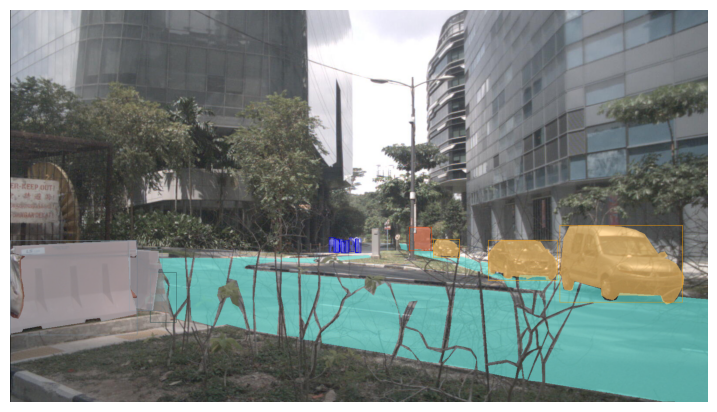

In [ ]:
nuim.render_image(key_camera_token_0)

## Reference:
If used
 `https://github.com/asvath/mobile_robotics/blob/master/nuscenes%20extract%20and%20write%20out%202d%20annotation%20boxes-revised%20to%20truncate%20bb.ipynb `


In [ ]:
from pyquaternion import Quaternion
from nuscenes.utils.data_classes import Box
# from nuscenes.utils.geometry_utils import quaternion_slerp, box_in_image, BoxVisibility
import numpy as np

In [ ]:
def all_3d_to_2d(boxes,anns,intrinsic): #input 3d boxes, annotation key lists, intrinsic matrix (one image)
    x_min=[]
    x_max=[]
    y_min=[]
    y_max =[]
    width=[]
    height=[]
    objects_detected =[]
    orig_objects_detected =[]


    for j in range(len(boxes)): #iterate through boxes
        box=boxes[j]

        if box.name in classes: #if the box.name is in the classes we want to detect

            if box.name in pedestrians:
                orig_objects_detected.append("pedestrian")
            elif box.name == "vehicle.car":
                orig_objects_detected.append("car")
            else:
                orig_objects_detected.append("cyclist")
            #print(box)

            visibility = nusc.get('sample_annotation', '%s' %anns[j])['visibility_token'] #give annotation key
            visibility = int(visibility)


            if visibility > 1: #more than 40% visible in the panoramic view of the the cameras


                center = box.center #get boxe's center

                center = np.dot(intrinsic,center)
                center_point = center/(center[2]) #convert center point into image plane




                if center_point[0] <-100 or center_point[0] > 1700 or center_point[1] <-100 or center_point[1] >1000:
                    #if center of bounding box is outside of the image, do not annotate
                    pass

                else:
                    min_x, max_x, min_y, max_y = threeD_2_twoD(box,intrinsic) #converts box into image plane
                    w = max_x - min_x
                    h = max_y - min_y


                    x_min.append(min_x)
                    x_max.append(max_x)
                    y_min.append(min_y)
                    y_max.append(max_y)
                    width.append(w)
                    height.append(h)
                    if box.name in pedestrians:
                        objects_detected.append("pedestrian")
                    elif box.name == "vehicle.car":
                        objects_detected.append("car")
                    else:
                        objects_detected.append("cyclist")


            else:
                pass

    return x_min,x_max,y_min,y_max,width,height,objects_detected,orig_objects_detected #for a single image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
def extract_bounding_box(i,camera_name): #give a single sample number and camera name

    '''
    input sample number i, camera name
    outputs min x, max x, min y max y, width and height of bounding box in image coordinates
    2d bounding box
    options for camera name : CAM_FRONT, CAM_FRONT_RIGHT, CAM_FRONT_LEFT, CAM_BACK, CAM_BACK_RIGHT,CAM_BACK_LEFT
    '''

    nuim.sample[i] #one image

    camera_token = nuim.sample[i]['data']['%s' %camera_name] #one camera, get the camera token

    path, boxes, anns, intrinsic_matrix = get_sample_data(nusc,'%s' %camera_token) #gets data for one image

    x_min, x_max,y_min,y_max,width,height, objects_detected,orig_objects_detected = all_3d_to_2d(boxes,anns, intrinsic_matrix)

    return x_min, x_max, y_min, y_max, width, height, path, boxes,intrinsic_matrix, objects_detected,orig_objects_detected
    #info for a single image



# KITTI Data

# Model data processing Test

In [ ]:
from transformers import AutoImageProcessor, DetrForObjectDetection
import torch
from PIL import Image
import requests

In [ ]:
file_path = "drive/MyDrive/Nuscenes_mini/"
image = Image.open(file_path+filename_0)

In [ ]:

inputs = image_processor(images=image, return_tensors="pt")
outputs = model(**inputs)

# convert outputs (bounding boxes and class logits) to Pascal VOC format (xmin, ymin, xmax, ymax)
target_sizes = torch.tensor([image.size[::-1]])
results = image_processor.post_process_object_detection(outputs, threshold=0.9, target_sizes=target_sizes)[
    0
]


for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    print(
        f"Detected {model.config.id2label[label.item()]} with confidence "
        f"{round(score.item(), 3)} at location {box}")

results

Detected car with confidence 0.964 at location [1262.73, 495.72, 1543.24, 672.16]
Detected car with confidence 0.994 at location [1093.0, 531.03, 1255.25, 618.95]
Detected car with confidence 0.988 at location [973.93, 524.69, 1031.93, 567.48]
Detected truck with confidence 0.94 at location [1263.58, 497.62, 1542.92, 672.54]


{'scores': tensor([0.9636, 0.9945, 0.9876, 0.9395], grad_fn=<IndexBackward0>),
 'labels': tensor([3, 3, 3, 8]),
 'boxes': tensor([[1262.7272,  495.7199, 1543.2390,  672.1633],
         [1092.9999,  531.0280, 1255.2532,  618.9470],
         [ 973.9298,  524.6917, 1031.9323,  567.4797],
         [1263.5806,  497.6208, 1542.9165,  672.5410]],
        grad_fn=<IndexBackward0>)}

In [ ]:
bbox_m = []
for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
  bbox_m.append({"bbox":box.tolist(),"category":model.config.id2label[label.item()]})

bbox_m

[{'bbox': [1262.7271728515625,
   495.71990966796875,
   1543.239013671875,
   672.163330078125],
  'category': 'car'},
 {'bbox': [1092.9998779296875,
   531.0279541015625,
   1255.253173828125,
   618.9469604492188],
  'category': 'car'},
 {'bbox': [973.9298095703125,
   524.691650390625,
   1031.9322509765625,
   567.479736328125],
  'category': 'car'},
 {'bbox': [1263.58056640625,
   497.620849609375,
   1542.91650390625,
   672.541015625],
  'category': 'truck'}]

In [ ]:
bbox_1 = []
for i in bbox_0:
  x = i['category'].split(".")
  if x[0] == "vehicle":
    # i["category"] = x[1]

    bbox_1.append({"bbox":i["bbox"],"category":x[1]})

bbox_1

[{'bbox': [1096, 529, 1254, 621], 'category': 'car'},
 {'bbox': [970, 527, 1030, 569], 'category': 'car'},
 {'bbox': [1260, 495, 1541, 671], 'category': 'car'},
 {'bbox': [915, 499, 966, 553], 'category': 'bus'}]

# Potential Accuracy metrics



---

## Precision

*   **Precision ** is the ratio of correctly predicted bounding boxes (true positives) to all predicted bounding boxes (true positives + false positives).

With a precision of 0.75, this means:

75% of the model’s predicted bounding boxes were correct detections (i.e., they matched ground-truth boxes with a sufficiently high Intersection over Union, or IoU).
25% of the model's predictions were false positives, meaning the model incorrectly detected some bounding boxes that did not match any ground-truth box or were of the wrong class.


## Recall

*   Recall is the ratio of correctly predicted bounding boxes to all actual bounding boxes (true positives + false negatives).

With a recall of 0.75, this means:

The model successfully detected 75% of the actual objects present in the ground-truth data.
25% of the ground-truth boxes were missed (false negatives), meaning some objects were not detected at all by the model.





In [ ]:
import numpy as np

def calculate_iou(box1, box2):
    # box = [x_min, y_min, x_max, y_max]
    x_min_inter = max(box1[0], box2[0])
    y_min_inter = max(box1[1], box2[1])
    x_max_inter = min(box1[2], box2[2])
    y_max_inter = min(box1[3], box2[3])

    inter_area = max(0, x_max_inter - x_min_inter + 1) * max(0, y_max_inter - y_min_inter + 1)

    box1_area = (box1[2] - box1[0] + 1) * (box1[3] - box1[1] + 1)
    box2_area = (box2[2] - box2[0] + 1) * (box2[3] - box2[1] + 1)

    iou = inter_area / float(box1_area + box2_area - inter_area)
    return iou

# Example IoU threshold
iou_threshold = 0.5

In [ ]:
def evaluate_detections(detections, ground_truth, iou_threshold=0.5):
    true_positives = 0
    false_positives = 0
    false_negatives = 0

    for det in detections:
        detected_box, detected_class = det["bbox"], det["category"]
        # detected_conf = det["confidence"]
        matched = False
        for gt in ground_truth:
            gt_box, gt_class = gt["bbox"], gt["category"]
            if detected_class == gt_class and calculate_iou(detected_box, gt_box) >= iou_threshold:
                true_positives += 1
                matched = True
                break
        if not matched:
            false_positives += 1

    false_negatives = len(ground_truth) - true_positives
    precision = true_positives / (true_positives + false_positives)
    recall = true_positives / (true_positives + false_negatives)

    return precision, recall

# Try Metrics

In [ ]:
metric_res = evaluate_detections(detections=bbox_m,ground_truth=bbox_1)
print(metric_res)


(0.75, 0.75)
